In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
plt.rcParams['image.cmap'] = 'gray'

from tensorflow.keras.datasets import mnist

#import pandas as pd

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [3]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)



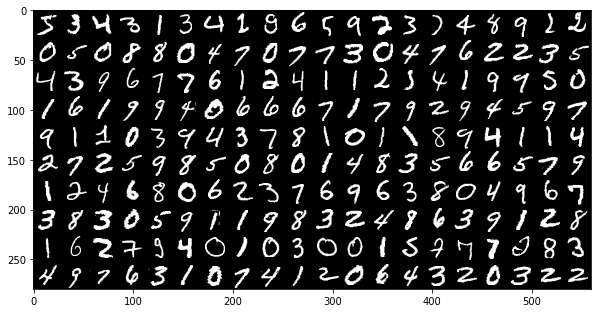

In [4]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(x_train));

In [9]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True,n_iter=100)
rbm.fit(x_train.reshape(len(x_train),28*28))



[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.04, time = 17.72s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -98.47, time = 20.46s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -92.34, time = 23.56s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.44, time = 20.12s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.96, time = 21.69s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.47, time = 22.87s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.20, time = 20.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.62, time = 19.75s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -79.98, time = 21.17s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -79.82, time = 21.14s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -79.96, time = 19.64s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -78.77, time = 21.59s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -78.68, time = 21.01s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -78.01, time = 21.60s
[BernoulliRBM]

BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=100,
       random_state=0, verbose=True)

In [13]:
# sampling

xx = x_train[:40].reshape(40,28*28).copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

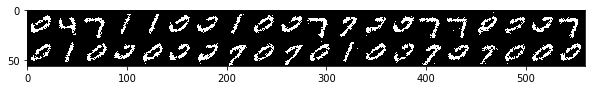

In [14]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

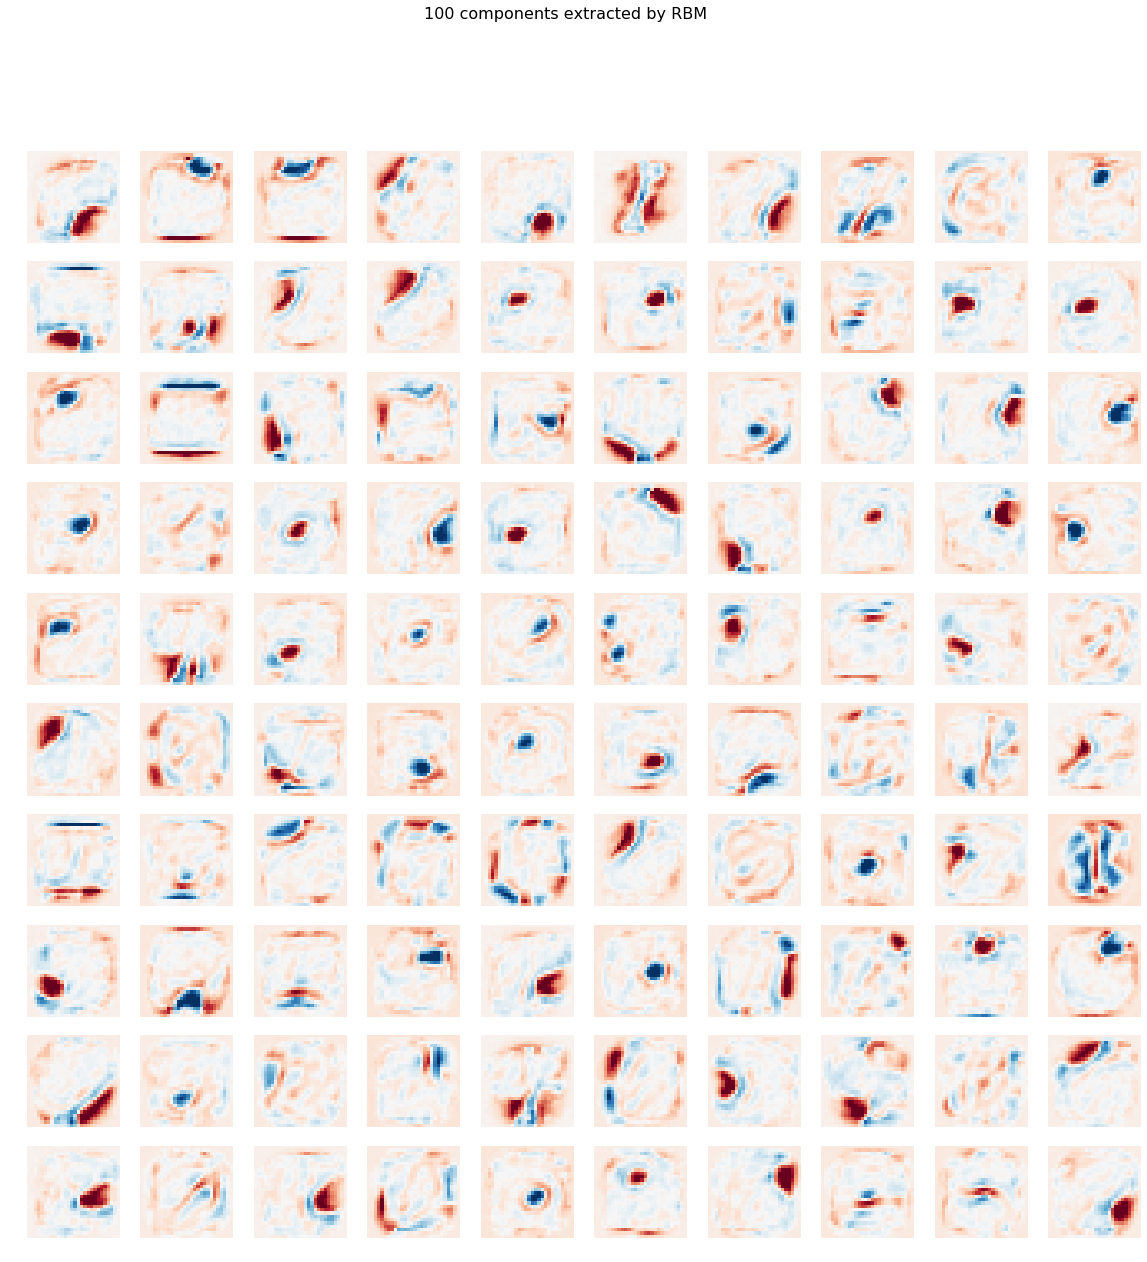

In [12]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);



In [24]:
np.shape(rbm.components_)

(100, 784)